In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
import csv
def convert_to_csv(pathfile,newpathfile):
    with open(pathfile, 'r') as dat_file:
        with open(newpathfile, 'w', newline='') as csv_file:
            csv_writer = csv.writer(csv_file)
            for row in dat_file:
                row = [value.strip() for value in row.split('|')]
                print(row)
                csv_writer.writerow(row)

### breast-w Dataset

In [71]:
convert_to_csv('./data/breast_w/breast-cancer-wisconsin.data','./data/breast_w/breast_w.csv')
df_breast_w=pd.read_csv('./data/breast_w/breast_w.csv',header=None)
df_breast_w.columns=['id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhension,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class']
df_breast_w[df_breast_w.columns[0].split(',')] = df_breast_w.iloc[:,0].str.split(',', expand=True)
df_breast_w.drop(columns=[df_breast_w.columns[0],'id'],axis=1,inplace=True)
df_breast_w.to_csv('./data/breast_w/clean_breast_w.csv')


['1000025,5,1,1,1,2,1,3,1,1,2']
['1002945,5,4,4,5,7,10,3,2,1,2']
['1015425,3,1,1,1,2,2,3,1,1,2']
['1016277,6,8,8,1,3,4,3,7,1,2']
['1017023,4,1,1,3,2,1,3,1,1,2']
['1017122,8,10,10,8,7,10,9,7,1,4']
['1018099,1,1,1,1,2,10,3,1,1,2']
['1018561,2,1,2,1,2,1,3,1,1,2']
['1033078,2,1,1,1,2,1,1,1,5,2']
['1033078,4,2,1,1,2,1,2,1,1,2']
['1035283,1,1,1,1,1,1,3,1,1,2']
['1036172,2,1,1,1,2,1,2,1,1,2']
['1041801,5,3,3,3,2,3,4,4,1,4']
['1043999,1,1,1,1,2,3,3,1,1,2']
['1044572,8,7,5,10,7,9,5,5,4,4']
['1047630,7,4,6,4,6,1,4,3,1,4']
['1048672,4,1,1,1,2,1,2,1,1,2']
['1049815,4,1,1,1,2,1,3,1,1,2']
['1050670,10,7,7,6,4,10,4,1,2,4']
['1050718,6,1,1,1,2,1,3,1,1,2']
['1054590,7,3,2,10,5,10,5,4,4,4']
['1054593,10,5,5,3,6,7,7,10,1,4']
['1056784,3,1,1,1,2,1,2,1,1,2']
['1057013,8,4,5,1,2,?,7,3,1,4']
['1059552,1,1,1,1,2,1,3,1,1,2']
['1065726,5,2,3,4,2,7,3,6,1,4']
['1066373,3,2,1,1,1,1,2,1,1,2']
['1066979,5,1,1,1,2,1,2,1,1,2']
['1067444,2,1,1,1,2,1,2,1,1,2']
['1070935,1,1,3,1,2,1,1,1,1,2']
['1070935,3,1,1,1,1,1,2,1,1,

### tic-tac-toe

In [319]:
convert_to_csv('./data/tic_tac_toe/tic-tac-toe.data','./data/tic_tac_toe/tic-tac-toe.csv')
df_ttt=pd.read_csv('./data/tic_tac_toe/tic-tac-toe.csv',header=None).rename({0:"top-left",1:'top-middle',2:'top-right',3:'middle-left',4:'middle-middle',5:'middle-right',6:'bottom-left',7:'bottom-middle',8:'bottom-right',9:'class'},axis=1).dropna().reset_index(drop=True)
df_ttt.to_csv('./data/tic_tac_toe/clean_tic-tac-toe.csv')


### hepatitis Data

In [61]:
convert_to_csv('./data/hepatitis/hepatitis.data','./data/hepatitis/hepatitis.csv')
df_hepatitis=pd.read_csv('./data/hepatitis/hepatitis.csv',header=None)
df_hepatitis.columns=['class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,big liver,firm liver,palpable spleen,spiders,ascites,varices,bilirubin,phosphate,sgot,albumin,protime,histology']
df_hepatitis[df_hepatitis.columns[0].split(',')] = df_hepatitis.iloc[:,0].str.split(',', expand=True)
df_hepatitis.drop(df_hepatitis.columns[0],axis=1,inplace=True)
df_hepatitis=df_hepatitis.replace('?',np.nan).dropna().reset_index(drop=True)
df_hepatitis['age']=df_hepatitis['age'].astype('int')
df_hepatitis['phosphate']=df_hepatitis['phosphate'].astype('int')
df_hepatitis['sgot']=df_hepatitis['sgot'].astype('int')
df_hepatitis['albumin']=df_hepatitis['albumin'].astype('float')
df_hepatitis['protime']=df_hepatitis['protime'].astype('float')
df_hepatitis['bilirubin']=df_hepatitis['bilirubin'].astype('float')

['2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1']
['2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1']
['2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1']
['2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1']
['2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1']
['2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1']
['1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1']
['2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1']
['2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1']
['2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,120,3.9,?,1']
['2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1']
['2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,1']
['2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,1']
['2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.20,57,144,4.9,78,1']
['2,47,1,1,1,2,2,2,2,2,2,2,2,2,?,?,60,?,?,1']
['2,38,1,1,2,1,1,1,2,2,2,2,1,2,2.00,72,89,2.9,46,1']
['2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.20,102,53,4.3,?,1']
['2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.60,62,166,4.0,63,1']
['2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.70,53,42,4.1,85,2']
['2,38,1,1,1,2,2

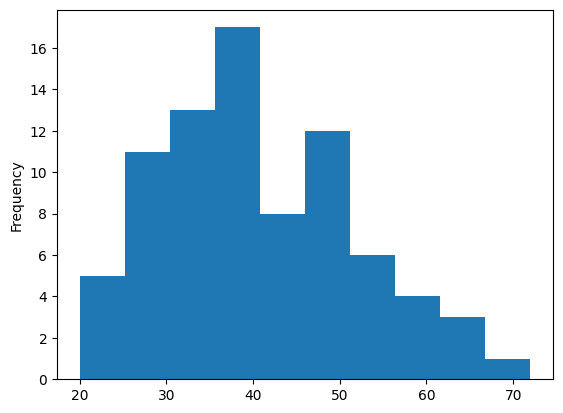

In [62]:
df_hepatitis['age'].plot.hist()

bins=[20,30,40,50,60,70,80]
labels=['20-30','30-40','40-50','50-60','60-70','70-80']
df_hepatitis['age']=pd.cut(df_hepatitis['age'],bins=bins,labels=labels,include_lowest=True)

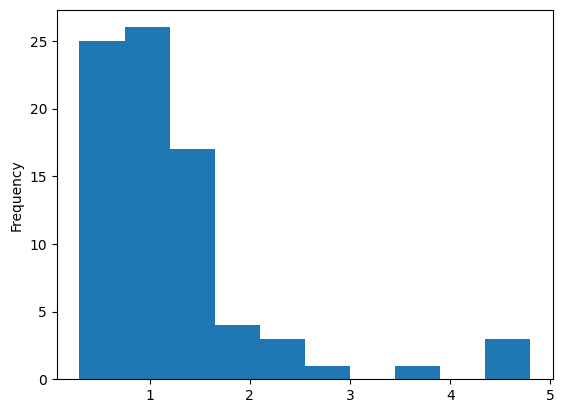

In [63]:
df_hepatitis['bilirubin'].plot.hist()

# Discretising into bins
bins=[0,0.5,1,1.5,2,np.inf]
labels=['0-0.5','0.5-1','1-1.5','1.5-2','2 & Above']
df_hepatitis['bilirubin']=pd.cut(df_hepatitis['bilirubin'],bins=bins,labels=labels,include_lowest=True)

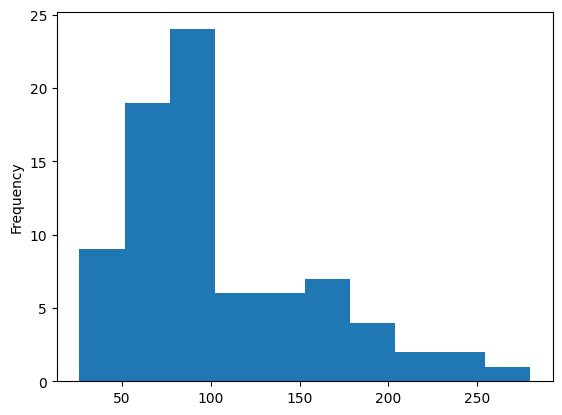

In [64]:
df_hepatitis['phosphate'].plot.hist()
#Discretising into bins
bins=[0,50,100,150,200,250,np.inf]
labels=['0-50','50-100','100-150','150-200','200-250','250 & Above']
df_hepatitis['phosphate']=pd.cut(df_hepatitis['phosphate'],bins=bins,labels=labels)

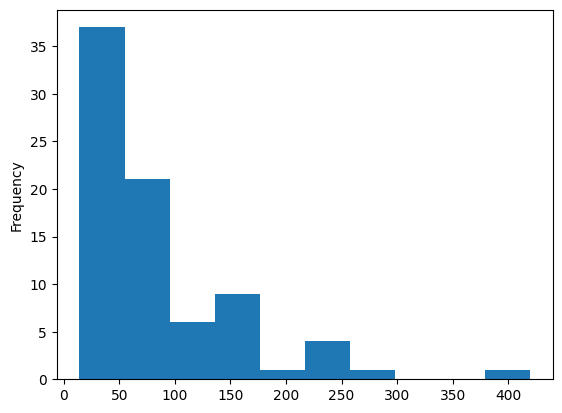

In [65]:
df_hepatitis['sgot'].plot.hist()

#Discretising into bins
bins=[0,100,200,300,np.inf]
labels=['0-100','100-200','200-300','300 & Above']
df_hepatitis['sgot']=pd.cut(df_hepatitis['sgot'],bins=bins,labels=labels)


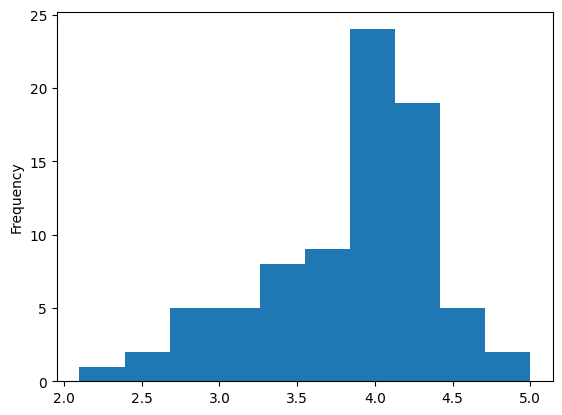

In [66]:
df_hepatitis['albumin'].plot.hist()
#Discretising into bins
bins=[2,2.5,3,3.5,4.0,4.5,5]
labels=['2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']
df_hepatitis['albumin']=pd.cut(df_hepatitis['albumin'],bins=bins,labels=labels)

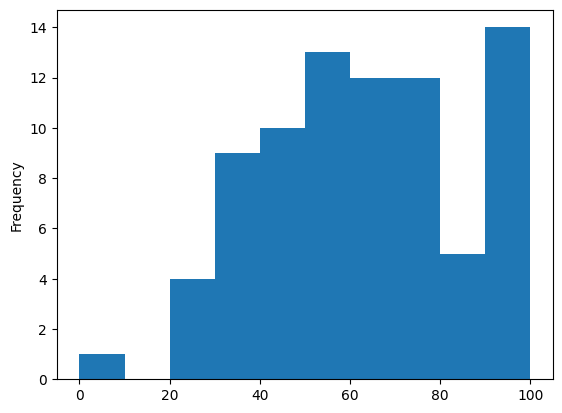

In [67]:
df_hepatitis['protime'].plot.hist()

#Discretising into bins
bins=[0,20,40,60,80,100]
labels=['0-20','20-40','40-60','60-80','80-100']
df_hepatitis['protime']=pd.cut(df_hepatitis['protime'],bins=bins,labels=labels,include_lowest=True)
df_hepatitis.to_csv('./data/hepatitis/clean_hepatitis.csv')


### German Data

In [27]:
df_german=pd.read_csv('./data/german/german.data',header=None)
df_german.columns=['status_of_existing_checking_account duration_(months) credit_history purpose credit_amount savings_account/bonds present_employment_since installment_rate personal_status_sex other_debtors present_residence property age other_installment_plans housing number_of_existing_credits job no._of_people_being_liable_to_provide_maintenance telephone foreign_worker class']
df_german[df_german.columns[0].split(' ')] = df_german.iloc[:,0].str.split(' ', expand=True)
df_german.drop(df_german.columns[0], axis=1, inplace=True)


    status_of_existing_checking_account duration_(months) credit_history purpose credit_amount savings_account/bonds present_employment_since installment_rate personal_status_sex other_debtors present_residence property age other_installment_plans housing number_of_existing_credits job no._of_people_being_liable_to_provide_maintenance telephone foreign_worker class
0    A11 6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 6...                                                                                                                                                                                                                                                                                                                         
1    A12 48 A32 A43 5951 A61 A73 2 A92 A101 2 A121 ...                                                                                                                                                                                                                  

In [410]:
df_german['age']=df_german['age'].astype('int')
df_german['duration_(months)']=df_german['duration_(months)'].astype('int')
df_german['credit_amount']=df_german['credit_amount'].astype('int')

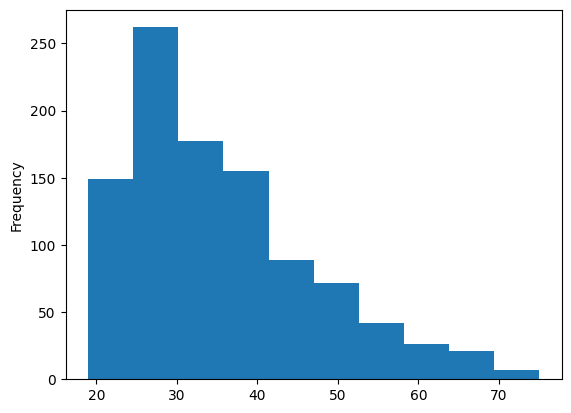

In [411]:
df_german['age'].plot.hist()

# Discretising into bins
bins=[10,20,30,40,50,60,70,80]
labels=['10-20','20-30','30-40','40-50','50-60','60-70','70-80']
df_german['age']=pd.cut(df_german['age'],bins=bins,labels=labels)

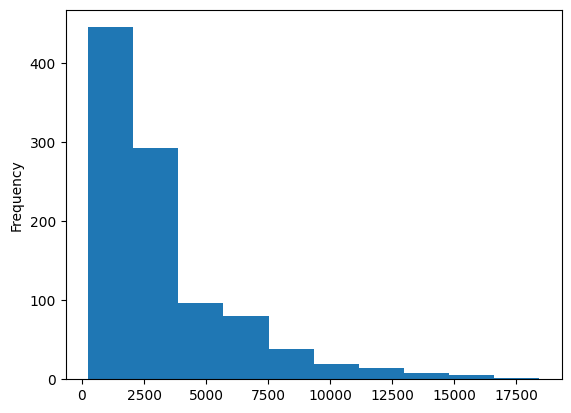

In [412]:
df_german['credit_amount'].plot.hist()

# Discretising into bins
bins=[0,2500,5000,7500,10000,12500,15000,17500,20000]
labels=['0-2500','2500-5000','5000-7500','7500-10000','10000-12500','12500-15000','15000-17500','17500-20000']
df_german['credit_amount']=pd.cut(df_german['credit_amount'],bins=bins,labels=labels)

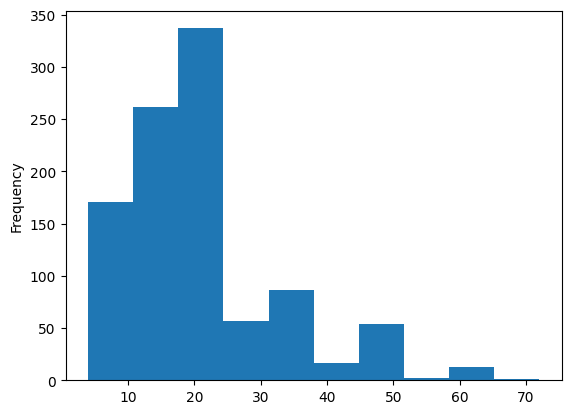

In [413]:
df_german['duration_(months)'].plot.hist()

bins=[0,10,20,30,40,50,60,70,80]
labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
df_german['duration_(months)']=pd.cut(df_german['duration_(months)'],bins=bins,labels=labels)

In [414]:
df_german=df_german.dropna().reset_index(drop=True)
df_german.to_csv('./data/german/clean_german.csv')

### zoo Dataset

In [584]:
df_zoo=pd.read_csv('./data/zoo/zoo.data',header=None).drop(columns=[0]).rename({1:'hair',2:'feathers',3:'eggs',4:'milk',5:'airborne',6:'aquatic',7:'predator',8:'toothed',9:'backbone',10:'breathes',11:'venomous',12:'fins',13:'legs',14:'tail',15:'domestic',16:'catsize',17:'type'},axis=1)
df_zoo.to_csv('./data/zoo/clean_zoo.csv')

### Gender Dataset

In [458]:
df_gender=pd.read_csv('./data/gender/gender.csv')
df_gender.isna().sum().sum()
## Nothing to clean no NAN value and no continuous value

0

### Stroke Dataset

In [503]:
df_train=pd.read_csv('./data/stroke/train.csv')
df_test=pd.read_csv('./data/stroke/test.csv')
df_merged=pd.concat([df_train,df_test])
# Drop all rows with Nan values and id column
df_merged=df_merged.drop(columns=['id']).dropna()

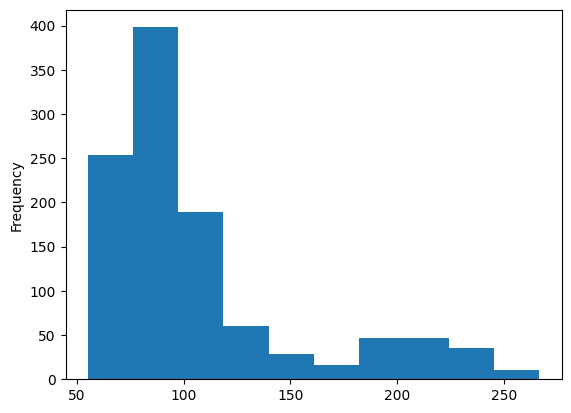

In [504]:
df_merged['avg_glucose_level'].plot.hist()

bins=[50,100,150,200,250,300]
labels=['50-100','100-150','150-200','200-250','250-300']
df_merged['avg_glucose_level']=pd.cut(df_merged['avg_glucose_level'],bins=bins,labels=labels)

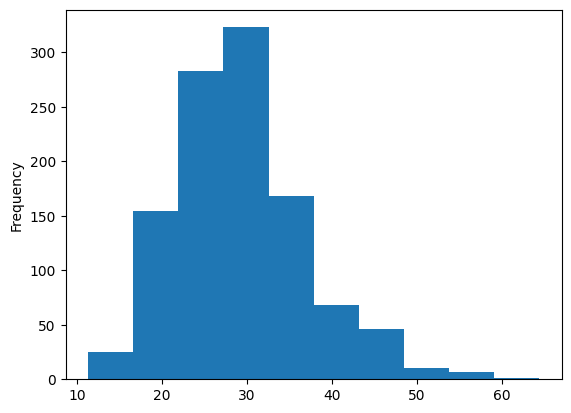

In [505]:
df_merged['bmi'].plot.hist()

bins=[10,20,30,40,50,60,70]
labels=['10-20','20-30','30-40','40-50','50-60','60-70']
df_merged['bmi']=pd.cut(df_merged['bmi'],bins=bins,labels=labels)

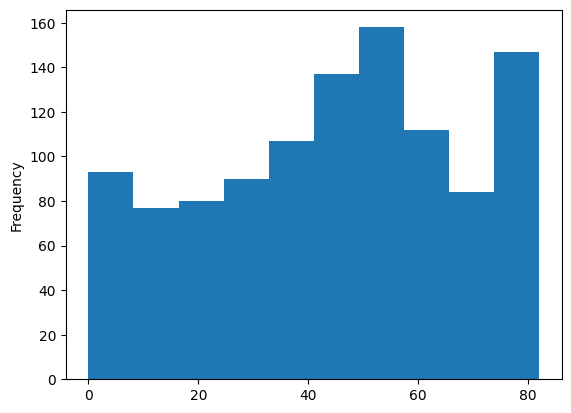

In [506]:
from turtle import left


df_merged=df_merged.replace('*82','82')
df_merged['age']=df_merged['age'].astype('int')
df_merged['age'].plot.hist()

bins=[0,20,40,60,np.inf]
labels=['0-20','20-40','40-60','60 & Above']
df_merged['age']=pd.cut(df_merged['age'],bins=bins,labels=labels,include_lowest=True)
df_merged.to_csv('./data/stroke/clean_stroke.csv')

### Mobile Dataset

In [566]:
#Only use train set as the test set does not have the target attribute
df_train=pd.read_csv('./data/mobile/train.csv')

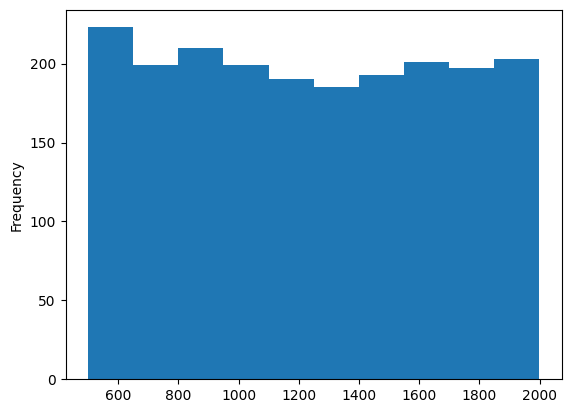

In [567]:
df_train['battery_power'].plot.hist()

bins=[400,800,1200,1600,2000]
labels=['400-800','800-1200','1200-1600','1600-2000']
df_train['battery_power']=pd.cut(df_train['battery_power'],bins=bins,labels=labels)


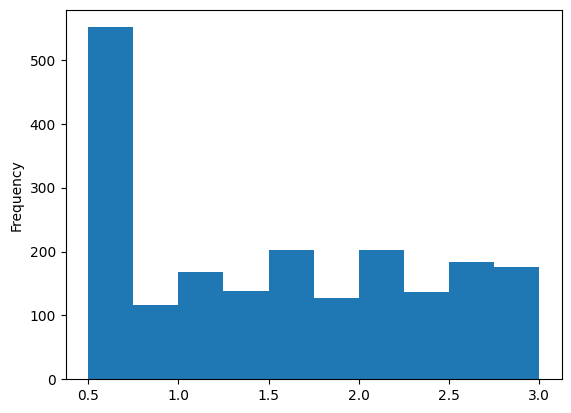

In [568]:
df_train['clock_speed'].plot.hist()

bins=[0.5,1.0,1.5,2.0,2.5,3.0]
labels=['0.5-1.0','1.0-1.5','1.5-2.0','2.0-2.5','2.5-3.0']
df_train['clock_speed']=pd.cut(df_train['clock_speed'],bins=bins,labels=labels,include_lowest=True)


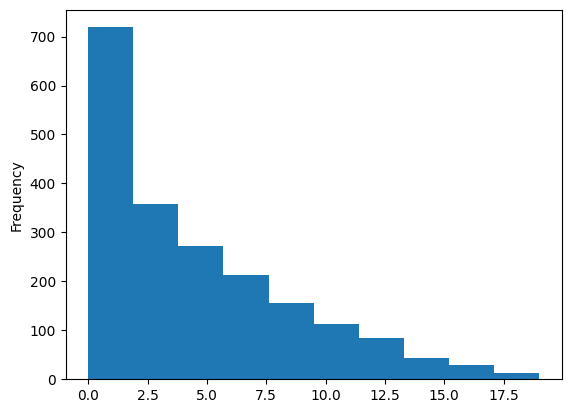

In [569]:
df_train['fc'].plot.hist()

bins=[0,5.0,10.0,15.0,20.0]
labels=['0.0-5.0','5.0-10.0','10.0-15.0','15.0-20.0']
df_train['fc']=pd.cut(df_train['fc'],bins=bins,labels=labels,include_lowest=True)


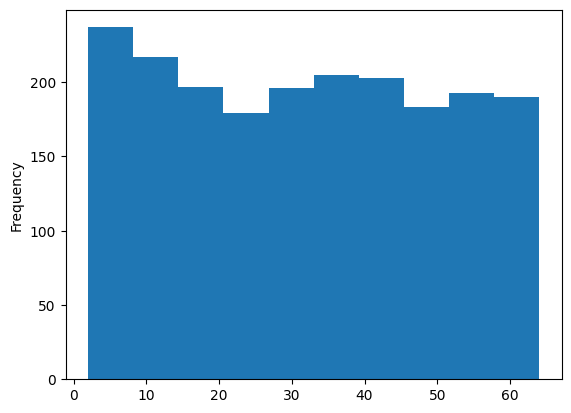

In [570]:
df_train['int_memory'].plot.hist()

bins=[0,20,40,60,80]
labels=['0-20','20-40','40-60','60-80']
df_train['int_memory']=pd.cut(df_train['int_memory'],bins=bins,labels=labels,include_lowest=True)


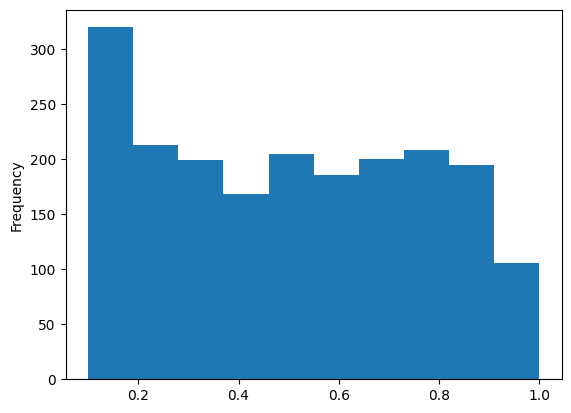

In [571]:
df_train['m_dep'].plot.hist()

bins=[0,0.2,0.4,0.6,0.8,1.0]
labels=['0-0.2','0.2-0.4','0.4-0.6','0.6-0.8','0.8-1.0']
df_train['m_dep']=pd.cut(df_train['m_dep'],bins=bins,labels=labels)


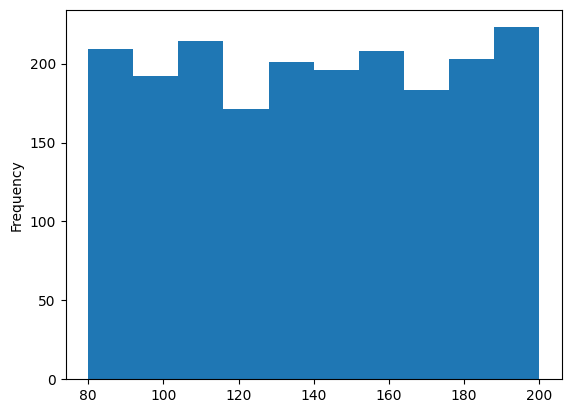

In [572]:
df_train['mobile_wt'].plot.hist()

bins=[80,120,160,200]
labels=['80-120','120-160','160-200']
df_train['mobile_wt']=pd.cut(df_train['mobile_wt'],bins=bins,labels=labels,include_lowest=True)


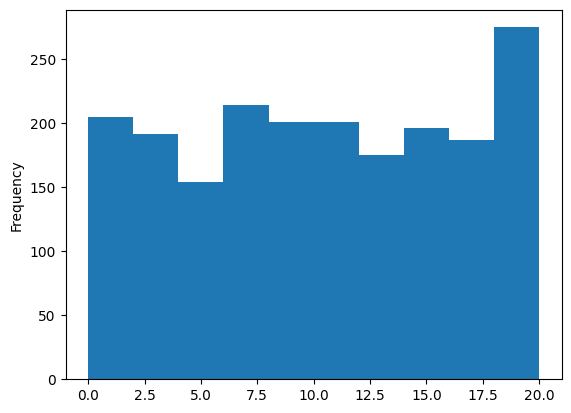

In [573]:
df_train['pc'].plot.hist()

bins=[0,5.0,10.0,15.0,20.0]
labels=['0.0-5.0','5.0-10.0','10.0-15.0','15.0-20.0']
df_train['pc']=pd.cut(df_train['pc'],bins=bins,labels=labels,include_lowest=True)


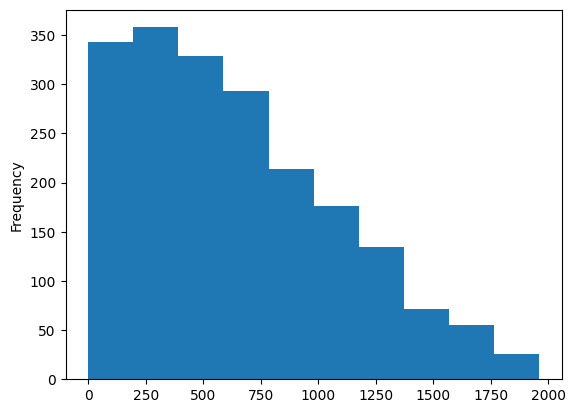

In [574]:
df_train['px_height'].plot.hist()

bins=[0,500,1000,1500,2000]
labels=['0-500','500-1000','1000-1500','1500-2000']
df_train['px_height']=pd.cut(df_train['px_height'],bins=bins,labels=labels,include_lowest=True)


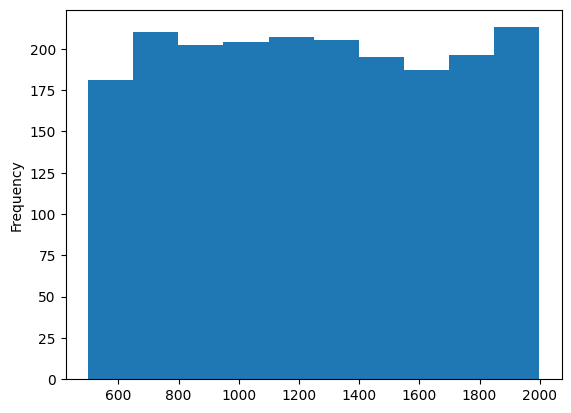

In [575]:
df_train['px_width'].plot.hist()

bins=[400,800,1200,1600,2000]
labels=['400-800','800-1200','1200-1600','1600-2000']
df_train['px_width']=pd.cut(df_train['px_width'],bins=bins,labels=labels,include_lowest=True)


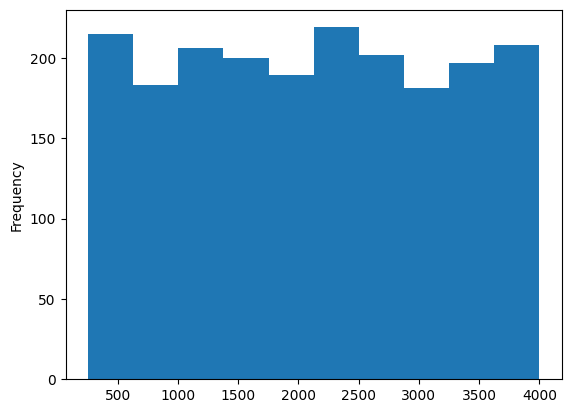

In [576]:
df_train['ram'].plot.hist()

bins=[0,1000,2000,3000,4000]
labels=['0-1000','1000-2000','2000-3000','3000-4000']
df_train['ram']=pd.cut(df_train['ram'],bins=bins,labels=labels,include_lowest=True)


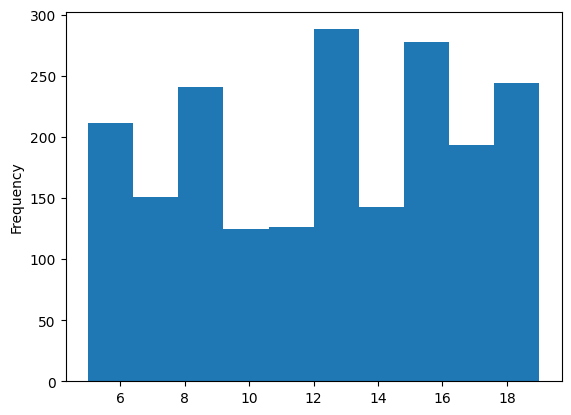

In [577]:
df_train['sc_h'].plot.hist()

bins=[5,8,11,14,17,20]
labels=['5-8','8-11','11-14','14-17','17-20']
df_train['sc_h']=pd.cut(df_train['sc_h'],bins=bins,labels=labels,include_lowest=True)


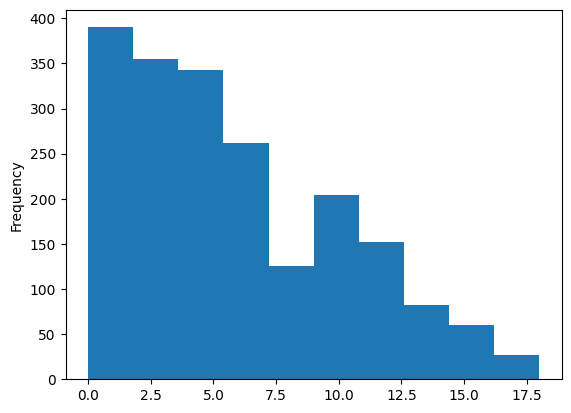

In [578]:
df_train['sc_w'].plot.hist()

bins=[0,5.0,10.0,15.0,20.0]
labels=['0.0-5.0','5.0-10.0','10.0-15.0','15.0-20.0']
df_train['sc_w']=pd.cut(df_train['sc_w'],bins=bins,labels=labels,include_lowest=True)


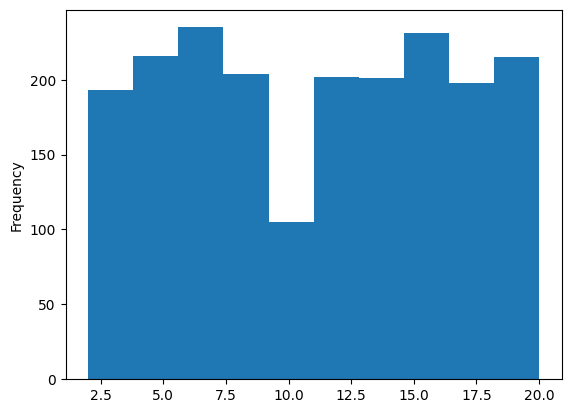

In [579]:
df_train['talk_time'].plot.hist()

bins=[0,5.0,10.0,15.0,20.0]
labels=['0.0-5.0','5.0-10.0','10.0-15.0','15.0-20.0']
df_train['talk_time']=pd.cut(df_train['talk_time'],bins=bins,labels=labels,include_lowest=True)
df_train.to_csv('./data/mobile/clean_mobile.csv')